## Classifying Fashion dataset using Artificial Nueral Networks

## About Dataset

### Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

### Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

### Labels

- Reference: https://www.kaggle.com/datasets/zalando-research/fashionmnist

### Importing Libraries

In [1]:
#!pip install tensorflow

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import models, datasets, layers, optimizers

In [3]:
# https://keras.io/api/datasets/

(X_train_full, y_train_full), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [4]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [8]:
X_train.shape

(50000, 28, 28)

In [9]:
X_valid.shape

(10000, 28, 28)

In [10]:
(X_train[0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

9


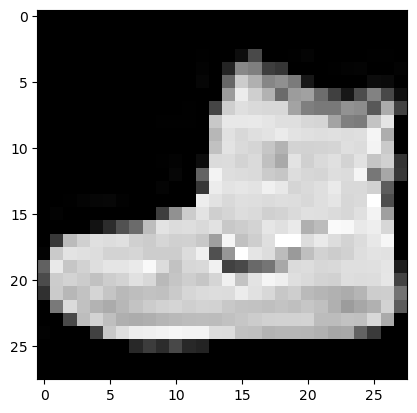

In [11]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

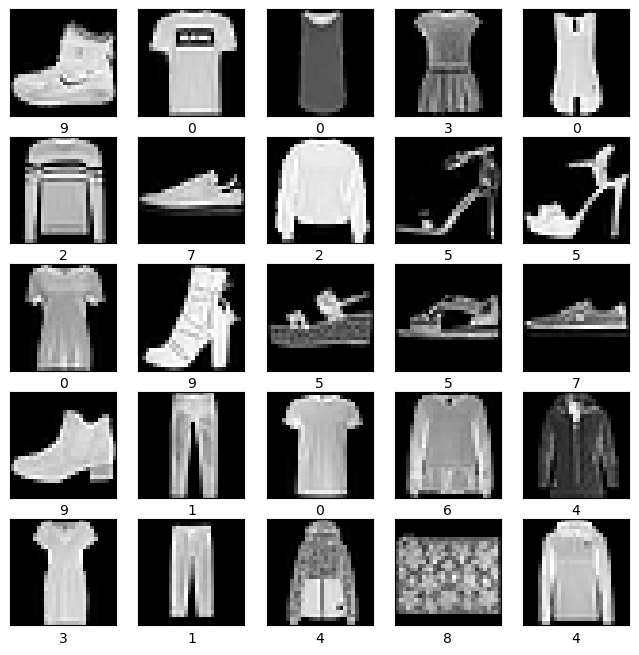

In [12]:
plt.figure(figsize=(8, 8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(y_train[i])
    plt.xticks([])
    plt.yticks([]);

In [13]:
(y_train)

array([9, 0, 0, ..., 5, 1, 7], dtype=uint8)

In [14]:
255*3

765

In [15]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model 1

- Without any hidden layer.

In [17]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1s 300us/step - loss: 0.6191 - accuracy: 0.7928
Epoch 2/5
1563/1563 [==============================] - 0s 295us/step - loss: 0.4708 - accuracy: 0.8400
Epoch 3/5
1563/1563 [==============================] - 0s 293us/step - loss: 0.4410 - accuracy: 0.8488
Epoch 4/5
1563/1563 [==============================] - 0s 294us/step - loss: 0.4254 - accuracy: 0.8541
Epoch 5/5
1563/1563 [==============================] - 0s 293us/step - loss: 0.4163 - accuracy: 0.8571


In [20]:
info = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 1s 418us/step - loss: 0.4088 - accuracy: 0.8590 - val_loss: 0.4327 - val_accuracy: 0.8494
Epoch 2/10
1563/1563 [==============================] - 1s 344us/step - loss: 0.4043 - accuracy: 0.8599 - val_loss: 0.4254 - val_accuracy: 0.8529
Epoch 3/10
1563/1563 [==============================] - 1s 344us/step - loss: 0.3988 - accuracy: 0.8628 - val_loss: 0.4243 - val_accuracy: 0.8543
Epoch 4/10
1563/1563 [==============================] - 1s 341us/step - loss: 0.3954 - accuracy: 0.8619 - val_loss: 0.4209 - val_accuracy: 0.8548
Epoch 5/10
1563/1563 [==============================] - 1s 351us/step - loss: 0.3923 - accuracy: 0.8649 - val_loss: 0.4243 - val_accuracy: 0.8532
Epoch 6/10
1563/1563 [==============================] - 1s 344us/step - loss: 0.3898 - accuracy: 0.8638 - val_loss: 0.4149 - val_accuracy: 0.8582
Epoch 7/10
1563/1563 [==============================] - 1s 344us/step - loss: 0.3864 - accuracy: 0.8652 - val_loss: 0.4144 -

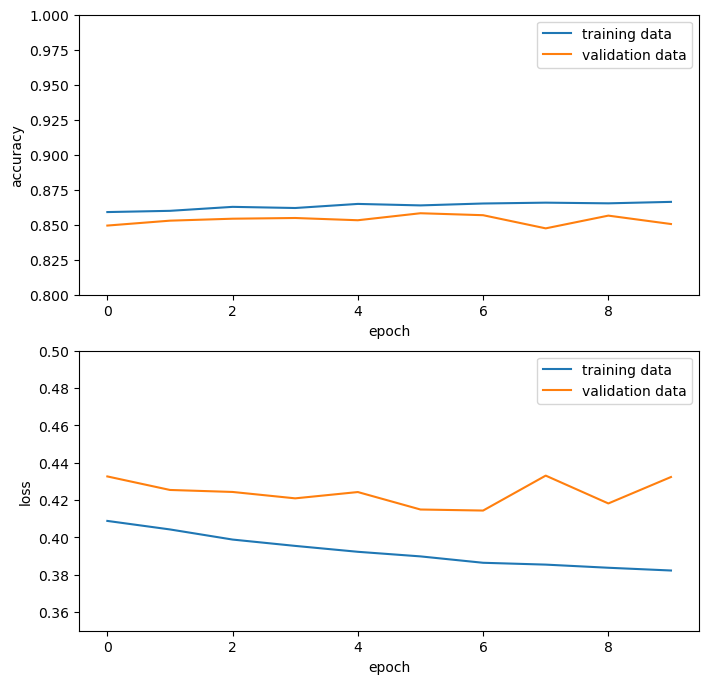

In [21]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.80,1.0])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.35,0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [22]:
ann1.evaluate(X_test, y_test)

313/313 [==============================] - 0s 264us/step - loss: 0.4619 - accuracy: 0.8415


[0.461856484413147, 0.8414999842643738]

In [23]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 [==============================] - 0s 215us/step


array([3.4140015e-07, 2.3392948e-09, 7.4091909e-06, 6.4126093e-06,
       5.2707401e-06, 1.4743625e-01, 3.1097265e-05, 9.5294103e-02,
       5.1296353e-03, 7.5208938e-01], dtype=float32)

In [24]:
np.argmax(y_pred[0])

9

9


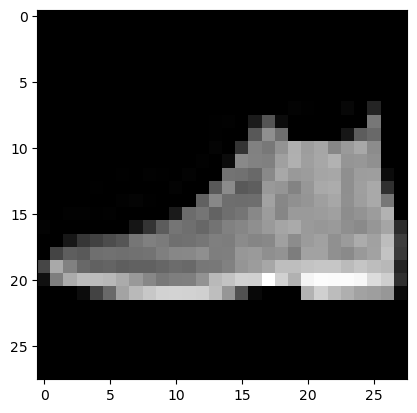

In [25]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

In [26]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [27]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[854,   3,  12,  37,   9,   0,  69,   0,  16,   0],
       [  3, 958,   3,  25,   6,   0,   3,   0,   2,   0],
       [ 27,   4, 705,  10, 189,   0,  51,   0,  14,   0],
       [ 34,  17,  17, 838,  54,   0,  32,   1,   7,   0],
       [  1,   1,  72,  21, 858,   0,  43,   0,   4,   0],
       [  0,   0,   0,   1,   0, 909,   0,  68,   3,  19],
       [173,   2, 119,  28, 184,   0, 468,   0,  26,   0],
       [  0,   0,   0,   0,   0,  24,   0, 967,   0,   9],
       [  6,   1,   5,   7,   5,   3,  10,   5, 958,   0],
       [  0,   0,   0,   0,   0,  11,   1,  88,   0, 900]])

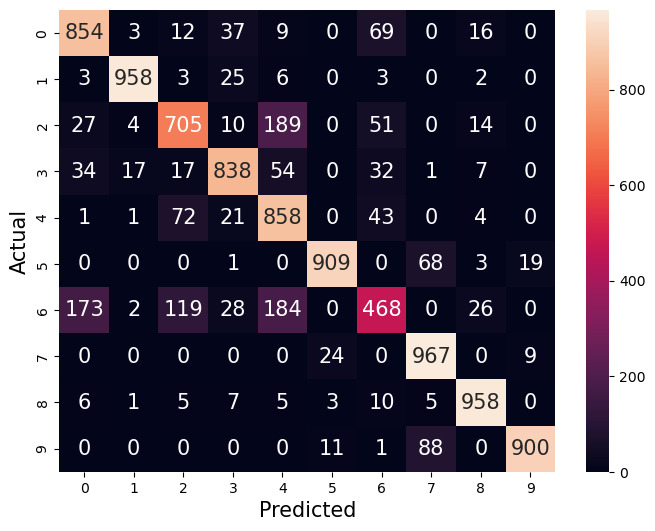

In [28]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.76      0.70      0.73      1000
           3       0.87      0.84      0.85      1000
           4       0.66      0.86      0.74      1000
           5       0.96      0.91      0.93      1000
           6       0.69      0.47      0.56      1000
           7       0.86      0.97      0.91      1000
           8       0.93      0.96      0.94      1000
           9       0.97      0.90      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Model 2

- Here, We will be using one hidden layer.

In [30]:
# Use one hidden layer

ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1s 460us/step - loss: 0.5148 - accuracy: 0.8205
Epoch 2/5
1563/1563 [==============================] - 1s 459us/step - loss: 0.3860 - accuracy: 0.8608
Epoch 3/5
1563/1563 [==============================] - 1s 456us/step - loss: 0.3487 - accuracy: 0.8728
Epoch 4/5
1563/1563 [==============================] - 1s 487us/step - loss: 0.3214 - accuracy: 0.8828
Epoch 5/5
1563/1563 [==============================] - 1s 487us/step - loss: 0.3010 - accuracy: 0.8890


In [31]:
ann2.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 306us/step - loss: 0.3571 - accuracy: 0.8689


[0.3571070730686188, 0.8689000010490417]

In [32]:
ann2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model 3

- Here, We will be using Dropout and Batch Normalization.

In [33]:
# Use dropout and batch normalization

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann3.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1s 535us/step - loss: 0.5344 - accuracy: 0.8126
Epoch 2/5
1563/1563 [==============================] - 1s 526us/step - loss: 0.4482 - accuracy: 0.8417
Epoch 3/5
1563/1563 [==============================] - 1s 530us/step - loss: 0.4205 - accuracy: 0.8501
Epoch 4/5
1563/1563 [==============================] - 1s 530us/step - loss: 0.4069 - accuracy: 0.8539
Epoch 5/5
1563/1563 [==============================] - 1s 527us/step - loss: 0.3904 - accuracy: 0.8593


In [34]:
ann3.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 321us/step - loss: 0.3935 - accuracy: 0.8570


[0.39350593090057373, 0.8569999933242798]

In [35]:
ann3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102282 (399.54 KB)
Trainable params: 102026 (398.54 KB)
Non-trainable params: 256 (1.00 KB)
______________

### Model 4

- Here, We will be using multiple hidden layers Regularization and dropout.

In [37]:
ann4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann4.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1s 601us/step - loss: 0.5769 - accuracy: 0.7913
Epoch 2/5
1563/1563 [==============================] - 1s 600us/step - loss: 0.4256 - accuracy: 0.8453
Epoch 3/5
1563/1563 [==============================] - 1s 598us/step - loss: 0.3891 - accuracy: 0.8581
Epoch 4/5
1563/1563 [==============================] - 1s 597us/step - loss: 0.3688 - accuracy: 0.8650
Epoch 5/5
1563/1563 [==============================] - 1s 596us/step - loss: 0.3507 - accuracy: 0.8715


In [38]:
ann4.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 337us/step - loss: 0.3389 - accuracy: 0.8740


[0.33894413709640503, 0.8740000128746033]

In [39]:
ann4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118

### Model 5

- Here, We will be using sgd optimizer with 2 hidden layers.

In [41]:
from tensorflow.keras.regularizers import L1
from tensorflow.keras.optimizers import SGD

In [43]:
sgd = SGD(learning_rate=0.001)
ann5 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

ann5.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann5.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1s 496us/step - loss: 0.9299 - accuracy: 0.6748
Epoch 2/5
1563/1563 [==============================] - 1s 519us/step - loss: 0.5992 - accuracy: 0.7903
Epoch 3/5
1563/1563 [==============================] - 1s 500us/step - loss: 0.5290 - accuracy: 0.8139
Epoch 4/5
1563/1563 [==============================] - 1s 486us/step - loss: 0.4867 - accuracy: 0.8276
Epoch 5/5
1563/1563 [==============================] - 1s 490us/step - loss: 0.4610 - accuracy: 0.8375


In [44]:
error,acc=ann5.evaluate(X_valid, y_valid)
print("Validation accuracy",acc)

313/313 [==============================] - 0s 342us/step - loss: 0.4198 - accuracy: 0.8446
Validation accuracy 0.8446000218391418


In [45]:
ann5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118

### Model 6

- Here, We will be using L1/L2 Regularization so that we can avoid overfitting.

In [46]:
from keras.regularizers import l2
from keras.regularizers import l1_l2

In [47]:
ann6 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann6.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann6.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 1s 596us/step - loss: 0.8395 - accuracy: 0.7961
Epoch 2/5
1563/1563 [==============================] - 1s 580us/step - loss: 0.5878 - accuracy: 0.8271
Epoch 3/5
1563/1563 [==============================] - 1s 601us/step - loss: 0.5505 - accuracy: 0.8341
Epoch 4/5
1563/1563 [==============================] - 1s 597us/step - loss: 0.5234 - accuracy: 0.8419
Epoch 5/5
1563/1563 [==============================] - 1s 610us/step - loss: 0.5090 - accuracy: 0.8447


In [49]:
ann6.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 339us/step - loss: 0.5601 - accuracy: 0.8251


[0.5601457953453064, 0.8251000046730042]

In [50]:
ann6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Summary

`Inferences:` A model without any hidden layers achieved an accuracy of approximately 84.1%, whereas a model with a single hidden layer containing 128 neurons reached an accuracy of roughly 86.9%.

Interestingly, the strategies employed to prevent overfitting, such as incorporating regularization techniques and dropout, had an unexpected consequence of reducing the model's accuracy rather than improving it.